# LetsGrowMore

# Data Science Internship

# Intern: Sachin Gupta

# Task 4: Prediction using Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('./Iris.csv', index_col = 0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
target = data['Species']
df = data.copy()
df = df.drop('Species', axis = 1)
df.shape

(150, 4)

In [7]:
X = data.iloc[:, [0, 1, 2, 3]].values
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
y = data['Species'].values
data.shape

(150, 5)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Traingin split:", X_train.shape)
print("Testin spllit:", X_test.shape)

Traingin split: (112, 4)
Testin spllit: (38, 4)


### Decision Tree Algorithm

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Classifier created.")

Decision Tree Classifier created.


In [10]:
y_pred = dtree.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [11]:
print("Accuracy:", sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


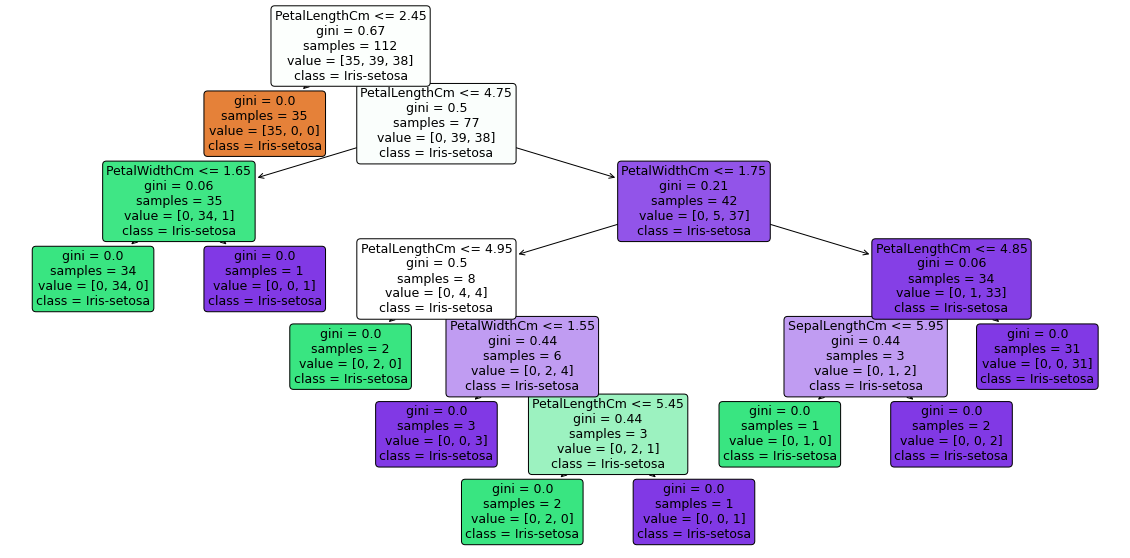

In [13]:
plt.figure(figsize = (20, 10))
tree = plot_tree(dtree, feature_names = df.columns, precision = 2, rounded = True,
               filled = True, class_names = target.values)